# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
warnings.filterwarnings('ignore')

# Load the Dataset

In [3]:
df = pd.read_csv(r'/content/twitter_disaster.csv')

In [4]:
df.head(5)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


# Part1. Explore Dataset Structure

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [6]:
df.shape

(7613, 5)

In [7]:
df.columns

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')

# Check missing values

In [8]:
#checking missing values:
df.isnull().sum()

,0
id,0
keyword,61
location,2533
text,0
target,0


# Class Distribution (Disaster vs. Non-Disaster)

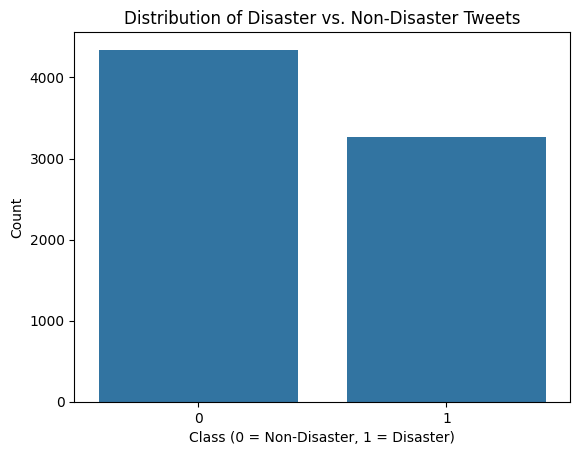

In [9]:
sns.countplot(data=df, x='target')
plt.title("Distribution of Disaster vs. Non-Disaster Tweets")
plt.xlabel("Class (0 = Non-Disaster, 1 = Disaster)")
plt.ylabel("Count")
plt.show()

# Keyword Frequency Analysis

In [10]:
disaster_tweets = df[df['target'] == 1]
non_disaster_tweets = df[df['target'] == 0]

In [ ]:
# Plot frequency of keywords in disaster tweets
disaster_keyword_counts = disaster_tweets['keyword'].value_counts().head(20)
disaster_keyword_counts.plot(kind='bar', title="Top Keywords in Disaster Tweets")
plt.xlabel("Keywords")
plt.ylabel("Frequency")
plt.show()

## Visualising lengths of tweets

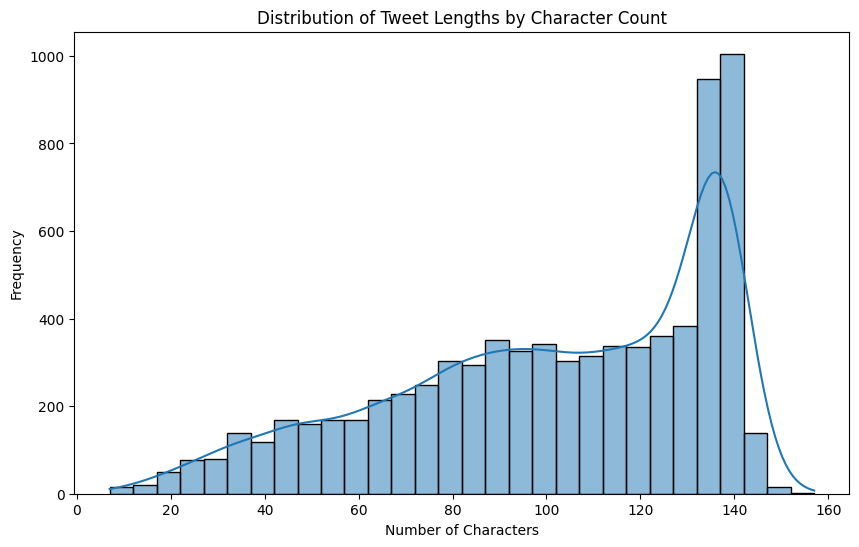

In [11]:
# Calculate tweet length by character count
df['char_length'] = df['text'].apply(len)

# Plotting the distribution of tweet lengths by character count
plt.figure(figsize=(10, 6))
sns.histplot(df['char_length'], bins=30, kde=True)
plt.title("Distribution of Tweet Lengths by Character Count")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.show()

In [12]:
df.char_length.describe()

,char_length
count,7613.000000
mean,101.037436
std,33.781325
min,7.000000
25%,78.000000
50%,107.000000
75%,133.000000
max,157.000000


In [13]:
df[df['char_length'] == 157]['text'].iloc[0]

"when you're taking a shower and someone flushes the toilet and you have .1 second to GTFO or you get burned??????????????????????????????????????????????????"

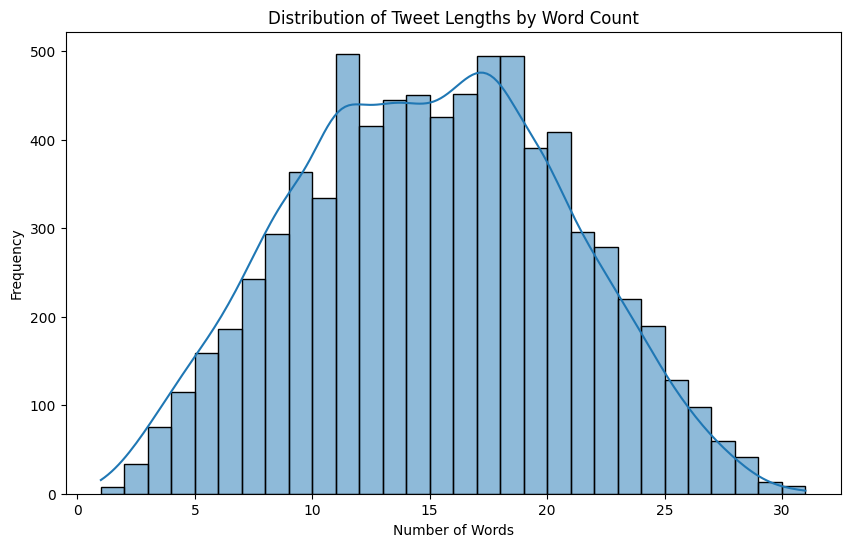

In [14]:
# Calculate tweet length by word count
df['word_length'] = df['text'].apply(lambda x: len(x.split()))
# Plotting the distribution of tweet lengths by word count
plt.figure(figsize=(10, 6))
sns.histplot(df['word_length'], bins=30, kde=True)
plt.title("Distribution of Tweet Lengths by Word Count")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

## Visualising most common punctuations in the text data

In [15]:
# Extract all punctuation marks from each tweet
def extract_punctuations(text):
    return re.findall(r'[^\w\s]', text)

In [16]:
# Flatten the list of punctuation from all tweets and count frequencies
from collections import Counter
all_punctuations = [punc for text in df['text'] for punc in extract_punctuations(text)]
punctuation_counts = Counter(all_punctuations)

In [17]:
# Convert to DataFrame for visualization
punctuation_df = pd.DataFrame(punctuation_counts.items(), columns=['Punctuation', 'Frequency'])
punctuation_df = punctuation_df.sort_values(by='Frequency', ascending=False)
print(punctuation_df)

   Punctuation  Frequency
13           /      14585
1            .      11696
11           :       6910
0            #       3403
2            '       3157
7            ?       3126
12           @       2759
6            -       1753
8            !       1173
14                   797
9            ;        587
15           &        457
10           )        373
16           (        349
20           *        179
19           |        152
17           [        132
18           ]        131
24           +         80
4            =         53
25           ÷         49
26           %         46
22           $         44
23                    44
27           ~         37
21           ¢         10
34           ©         10
32           ^          6
28           £          6
33           ¨          6
36           \          5
30           }          4
38           ¡          3
39           `          3
40           {          3
29           ¤          3
35           «          2
3           

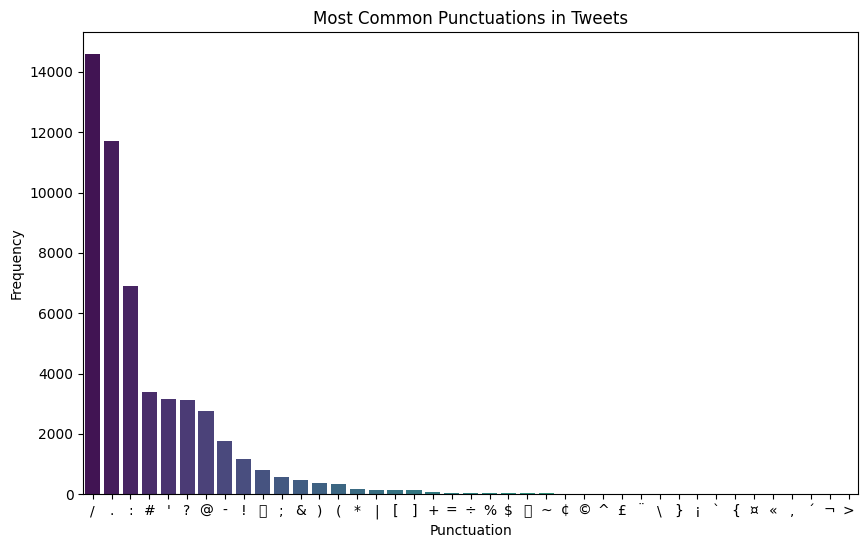

In [18]:
# Plotting the most common punctuations
plt.figure(figsize=(10, 6))
sns.barplot(x='Punctuation', y='Frequency', data=punctuation_df, palette="viridis")
plt.title("Most Common Punctuations in Tweets")
plt.xlabel("Punctuation")
plt.ylabel("Frequency")
plt.show()

# Part 2: Data Preparation

## 1. Text Cleaning

In [19]:
df['text'].head(5)

,text
0,Our Deeds are the Reason of this #earthquake M...
1,Forest fire near La Ronge Sask. Canada
2,All residents asked to 'shelter in place' are ...
3,"13,000 people receive #wildfires evacuation or..."
4,Just got sent this photo from Ruby #Alaska as ...


In [20]:
import re
def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#', '', text)
    text = re.sub(r'[^A-Za-z0-9 ]+', '', text)
    return text

In [21]:
df['cleaned_text'] = df['text'].apply(clean_text)

In [22]:
# Convert text column to lowercase
df["cleaned_text"] = df["cleaned_text"].str.lower()

In [23]:
df['cleaned_text'].head(5)

,cleaned_text
0,our deeds are the reason of this earthquake ma...
1,forest fire near la ronge sask canada
2,all residents asked to shelter in place are be...
3,13000 people receive wildfires evacuation orde...
4,just got sent this photo from ruby alaska as s...


## Creating function and data for visualising words
Using the popular WordCloud python library for visulaising the cleaned data

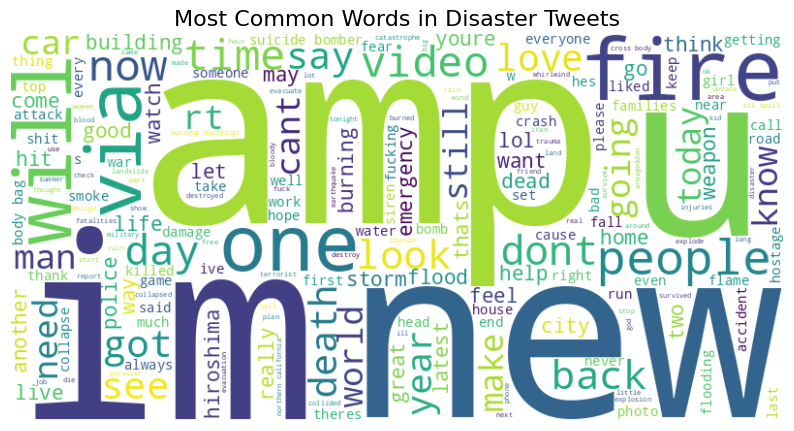

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_word_cloud(dataframe, column_name, title=None):
    # Combine all text in the specified column into one string
    text = " ".join(dataframe[column_name].astype(str))

    # Create the word cloud object
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

    # Display the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")  # Turn off axis

    # Add title if provided
    if title:
        plt.title(title, fontsize=16)

    plt.show()

# Run the function on the 'cleaned_text' column
generate_word_cloud(df, 'cleaned_text', title="Most Common Words in Disaster Tweets")

In [25]:
df['cleaned_text'].head(1)

,cleaned_text
0,our deeds are the reason of this earthquake ma...


In [28]:
 import nltk

In [30]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

### 2. Tokenization

In [31]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
df['tokens'] = df['cleaned_text'].apply(word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [32]:
df.head(5)

,id,keyword,location,text,target,char_length,word_length,cleaned_text,tokens
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13,our deeds are the reason of this earthquake ma...,"[our, deeds, are, the, reason, of, this, earth..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,22,all residents asked to shelter in place are be...,"[all, residents, asked, to, shelter, in, place..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,8,13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,16,just got sent this photo from ruby alaska as s...,"[just, got, sent, this, photo, from, ruby, ala..."


## Save cleaned data

In [33]:
df.to_csv(r'C:\Users\DELL\Desktop\Next Hikes Documents\Project7\Data\cleaned_twitter_disaster.csv',index=False)